<a href="https://colab.research.google.com/github/DGuilherme/PMTese/blob/main/Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets Tests


# Imports


In [3]:
from google.colab import files
import io
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score







# Alpi
Sequence of alarms logged by packaging equipment in an industrial environment.


## This data can be used to address the following tasks:

1. Next alarm forecasting: this problem can be framed as a supervised multi-class classification task, or a binary classification task when a specific alarm code is considered.
2. Predicting alarms occurring in a future time frame: here the goal is to forecast the occurrence of certain alarm types in a future time window. Since many alarms can occur, this is a supervised multi-label classification.
3. Future alarm sequence prediction: here the goal is predicting an ordered sequence of future alarms, in a sequence-to-sequence forecasting scenario.
4. Anomaly Detection: the task is to detect abnormal equipment conditions, based on the pattern of alarms sequence. This task can be either unsupervised, if only the input sequence is considered, or supervised if future alarms are taken into account to assess whether or not there is an anomaly.


In [ ]:
# raw data - timestamp, alarm, serial

# Upload the CSV file
uploaded = files.upload()

# Loop through the uploaded files
for file_name in uploaded.keys():
    print('Uploaded file:', file_name)


file_name = list(uploaded.keys())[0]  # Assuming only one file is uploaded
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


Saving alarms.csv to alarms.csv
Uploaded file: alarms.csv


In [ ]:
print(df)

                      timestamp  alarm  serial
0       2019-02-21 19:57:57.532    139       4
1       2019-02-21 19:58:28.293    139       4
2       2019-02-21 19:58:32.853    139       4
3       2019-02-21 19:59:05.387    139       4
4       2019-02-21 20:02:05.832    139       4
...                         ...    ...     ...
444829  2020-06-15 22:53:05.303    139      19
444830  2020-06-15 22:56:19.633    139      19
444831  2020-06-15 23:03:16.854    139      19
444832  2020-06-15 23:03:50.454    139      19
444833  2020-06-15 23:14:46.234     98      19

[444834 rows x 3 columns]


In [ ]:
df.timestamp = pd.to_datetime(df.timestamp)
df.nunique()

timestamp    444748
alarm           154
serial           20
dtype: int64

In [ ]:
df.groupby('serial').agg(['min', 'max'])['timestamp']


,min,max
serial,,
0,2019-09-12 16:31:26.632,2020-06-17 03:53:51.885
1,2019-02-21 15:56:43.356,2020-06-08 22:26:40.569
2,2019-02-21 12:36:46.507,2020-06-09 00:37:15.465
3,2019-02-21 10:16:18.130,2020-06-16 21:26:01.908
4,2019-02-21 19:57:57.532,2020-06-16 15:12:36.460
5,2019-02-21 18:30:10.378,2020-01-16 18:40:11.256
6,2019-02-21 12:56:14.339,2020-06-16 20:04:40.393
7,2019-02-21 12:57:16.213,2020-06-16 20:40:44.969
8,2019-02-21 12:30:23.150,2020-06-16 13:32:25.519


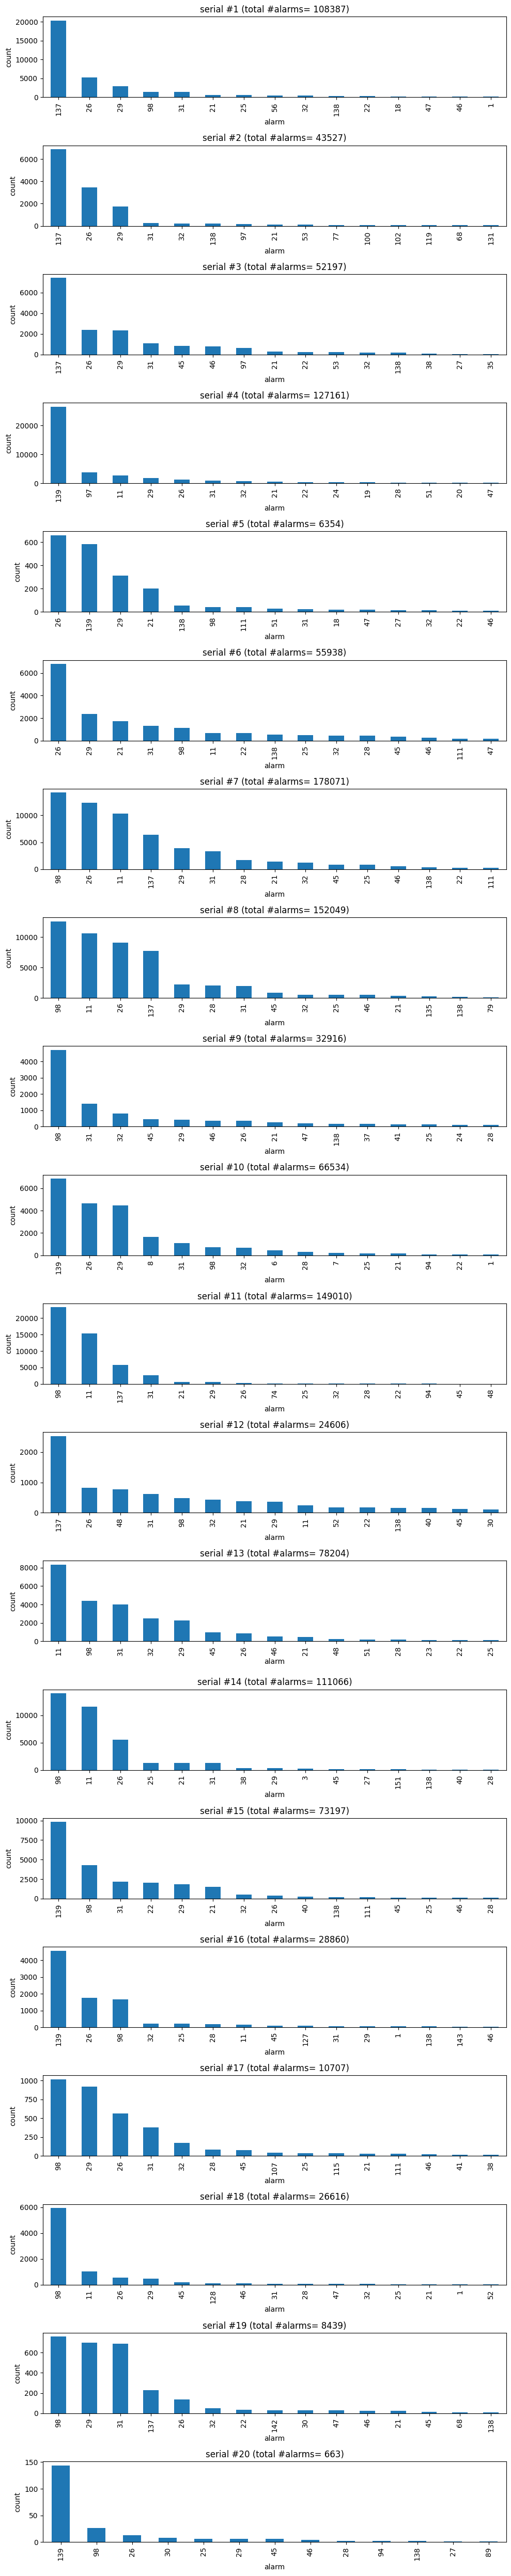

In [ ]:
fig, ax = plt.subplots(df.serial.nunique(), figsize=(10, 5 * 10))
topk = 15

for i, g in df.groupby('serial'):
    g.groupby('alarm').count().sort_values(
        'serial', ascending=False).iloc[:topk].serial.plot.bar(ax=ax[i])

    ax[i].set_title('serial #{} (total #alarms= {})'.format(i+1, g.size))
    ax[i].set_ylabel('count')

fig.tight_layout()

# NASA Turbofan Jet Engine Dataset [CMAPSS]

Analise de RUL

Cada serie é de um motor diferente.

Os motores nao tem o mesmo tipo de desgaste desde que começam.

Existem ruido nas leituras dos sensores.

O motor no inicio está a trabalhar corretamente no entanto começa a desenvolver um problema ao longo do tempo até ao limite da falha que é registada.

Objetivo: Determinar o numero de ciclos operacionais até a altura da falha.


In [17]:
# read dataset they are already divided into train and test.
columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

# Upload the CSV file
uploaded = files.upload()

# Loop through the uploaded files
for file_name in uploaded.keys():
    print('Uploaded file:', file_name)


file_name = list(uploaded.keys())[0]  # Assuming only one file is uploaded
rul_df_train = pd.read_csv(io.BytesIO(uploaded[file_name]), delim_whitespace=True, header=None)
#rul_df_train.drop(rul_df_train.columns[[26, 27]], axis=1, inplace=True)
rul_df_train.columns = columns

rul_df_train = rul_df_train.sort_values(['id','cycle'])
rul_df_train.head()

Saving train_FD001.txt to train_FD001 (7).txt
Uploaded file: train_FD001 (7).txt


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [18]:
# Data Labeling - generate column RUL
rul = pd.DataFrame(rul_df_train.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
rul_df_train = rul_df_train.merge(rul, on=['id'], how='left')
rul_df_train['RUL'] = rul_df_train['max'] - rul_df_train['cycle']
rul_df_train.drop('max', axis=1, inplace=True)
rul_df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [19]:
# Normalização a usar Minmax
rul_df_train['cycle_norm'] = rul_df_train['cycle']

# colunas que nao precisam normalização
cols_normalize = rul_df_train.columns.difference(['id','cycle','RUL'])

# escala para o minmax
min_max_scaler = preprocessing.MinMaxScaler()

# criar um df para os dados normalizados
rul_norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(rul_df_train[cols_normalize]),
                             columns=cols_normalize,
                             index=rul_df_train.index)

# df com todos os dados normalizados e nao normalizados
join_df = rul_df_train[rul_df_train.columns.difference(cols_normalize)].join(rul_norm_train_df)

# preservar a ordem dos dados
rul_df_train = join_df.reindex(columns = rul_df_train.columns)

rul_df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,RUL,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0.01108


# Gas Turbine Propulsion Plant [CBM]

Baixa na performance dos componentes dos motores nomeadamente compressor e turbinas.

O sistema tem os seguintes parametros:
* Velocidade do navio
* Coeficiente de degradaçao do compressor (kMc)
* Coeficiente de degradaçao da Torbina (tMc)
* Temos 16 features analisadas:
  * Lever position (lp)
  * Ship speed (v) [knots]
  * Gas Turbine (GT) shaft torque (GTT) [kN m]
  * GT rate of revolutions (GTn) [rpm]
  * Gas Generator rate of revolutions (GGn) [rpm]
  * Starboard Propeller Torque (Ts) [kN]
  * Port Propeller Torque (Tp) [kN]
  * Hight Pressure (HP) Turbine exit temperature (T48) [C]
  * GT Compressor inlet air temperature (T1) [C]
  * GT Compressor outlet air temperature (T2) [C]
  * HP Turbine exit pressure (P48) [bar]
  * GT Compressor inlet air pressure (P1) [bar]
  * GT Compressor outlet air pressure (P2) [bar]
  * GT exhaust gas pressure (Pexh) [bar]
  * Turbine Injecton Control (TIC) [%]
  * Fuel flow (mf) [kg/s]

# Gearbox Fault Diagnosis [GFD]

Gearbox Fault Diagnosis Data set include the vibration dataset recorded by using SpectraQuest's Gearbox Fault Diagnostics Simulator.

* recorded with the help of 4 vibration sensors placed in four different direction.
* recorded under variation of load from '0' to '90' percent.
* recorded in two different scenario:
  * Healthy condition
  * Broken Tooth Condition

# Condition monitoring of hydraulic systems [HYDSYS]

Dataset muito detalhado já foi usado em outros papers:

1. Nikolai Helwig, Eliseo Pignanelli, Andreas Sch�tze, �Condition Monitoring of a Complex Hydraulic System Using Multivariate Statistics�, in Proc. I2MTC-2015 - 2015 IEEE International Instrumentation and Measurement Technology Conference, paper PPS1-39, Pisa, Italy, May 11-14, 2015. doi: 10.1109/I2MTC.2015.7151267
  * detailed description of data and measurement setup
  * automated feature extraction via Pearson correlation and comparison of several classification algorithms
  * Cooler and Valve states are "easy" targets (perfect classification achieved), Pump and especially Accumulator states are more complex targets
2. N. Helwig, A. Sch�tze, �Detecting and compensating sensor faults in a hydraulic condition monitoring system�, in Proc. SENSOR 2015 - 17th International Conference on Sensors and Measurement Technology, oral presentation D8.1, Nuremberg, Germany, May 19-21, 2015. doi: 10.5162/sensor2015/D8.1
  * sensor drift and offset can be compensated by the automatic feature extraction described in [1]
  * faults of up to 5 sensors can be compensated for
3. Tizian Schneider, Nikolai Helwig, Andreas Sch�tze, �Automatic feature extraction and selection for classification of cyclical time series data�, tm - Technisches Messen (2017), 84(3), 198�206. doi: 10.1515/teme-2016-0072 - one of several example datasets for automatic feature extraction - with ALA and RFESVM the error rate was reduced to 0.35 % (from 9.6 % in [1]) for the hydraulic accumulator state classification

# [MAPM]

# [PPD]

# [UFD]